*Name:* _Ateeque Shaikh_

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')
# !pip3 install google-colab==1.0.0
# !pip install google-colab-1.0.0.tar.gz

In [78]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:\\Users\\ateeq\\EDA-Assignment\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        sample = pd.read_parquet(file_path)
        sample['date'] = sample['tpep_pickup_datetime'].dt.date
        sample['hour'] = sample['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in sample['date'].unique():
            df_date = sample[sample['date'] == date]
            # Iterate through each hour of the selected date
            for hour in sorted(df_date['hour'].unique()):
                df_hour = df_date[df_date['hour'] == hour]
                # Sample 5% of the hourly data randomly
                five_percent_data = df_hour.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data=pd.concat([sampled_data, five_percent_data], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [80]:
# Store the df in csv/parquet
df.to_csv("../sampled_hourly_data.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df=pd.read_csv('sampled_hourly_data.csv')

In [15]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True)
df=df.drop(columns=['date', 'hour'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns
df.Airport_fee=df.Airport_fee.fillna(df.airport_fee)
df=df.drop(columns=['airport_fee'])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [23]:
# check where values of fare amount are negative
neg_fare_amt_df = df[df['fare_amount'] < 0]
neg_fare_amt_df

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts
df[df.fare_amount<0].RatecodeID.value_counts()


Series([], Name: count, dtype: int64)

In [27]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include='number')

# Find columns with any negative values
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

# Print list of columns with negatives
print("Columns with negative values:", negative_columns.tolist())


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [29]:
# fix these negative values

# we have seen -ve value for extra column has 3 entries which we can remove
# we have seen -ve value for mta_tax column has 71 entries which we can remove
# we have seen -ve value for improvement_surcharge column has 78 entries which we can remove
# we have seen -ve value for total_amount column has 78 entries which we can remove
# we have seen -ve value for congestion_surcharge column has 56 entries which we can remove
# we have seen -ve value for Airport_fee column has 15 entries which we can remove
df=df[((df.mta_tax>0) | (df.mta_tax>0) | (df.improvement_surcharge>0) | (df.total_amount>0) | (df.congestion_surcharge>0) | (df.Airport_fee<0))]
# removed_negative_monetary_value_df[removed_negative_monetary_value_df['tpep_pickup_datetime']==removed_negative_monetary_value_df['tpep_dropoff_datetime']]
df

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1              1         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              2         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3              3         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4              4         2  2023-01-01 00:43:00   2023-01-01 01:01:00   
...          ...       ...                  ...                   ...   
1896395  1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20   
1896396  1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05   
1896397  1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42   
1896398  1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05   
1896399  1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           7.74         1.0                  N   
1                    2.0           1.24         1.0                  N   
2                    3.0           1.44         1.0                  N   
3                    1.0           0.54         1.0                  N   
4                    NaN          19.24         NaN                NaN   
...                  ...            ...         ...                ...   
1896395              1.0           0.79         1.0                  N   
1896396              3.0           0.50         1.0                  N   
1896397              1.0           1.09         1.0                  N   
1896398              2.0          13.20         1.0                  N   
1896399              1.0           2.97         1.0                  N   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 138           256             2        32.40    6.0   
1                 161           237             1         7.90    1.0   
2                 237           141             2        11.40    1.0   
3                 143           142             2         6.50    1.0   
4                  66           107             0        25.64    0.0   
...               ...           ...           ...          ...    ...   
1896395           231           231             1         8.60    1.0   
1896396           158            68             1         5.80    3.5   
1896397           161           162             1         9.30    1.0   
1896398           164            14             2        54.80    3.5   
1896399           231            68             1        17.00    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        0.00           0.0                    1.0   
1            0.5        2.58           0.0                    1.0   
2            0.5        0.00           0.0                    1.0   
3            0.5        0.00           0.0                    1.0   
4            0.5        5.93           0.0                    1.0   
...          ...         ...           ...                    ...   
1896395      0.5        2.00           0.0                    1.0   
1896396      0.5        2.15           0.0                    1.0   
1896397      0.5        2.86           0.0                    1.0   
1896398      0.5        0.00           0.0                    1.0   
1896399      0.5        4.40           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_fee  
0               41.15                   0.0         1.25  
1               15.48                   2.5         0.00  
2               16.40                   2.5         0.00  
3               11.50                   2.5         0.00  
4               35.57                   NaN          NaN  
...               ...                   ...          ...  
1896395         15.60                   2.5         0.00  
1896396         12.95                   2.5         0.00  
1896397 

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [31]:
# Find the proportion of missing values in each column
proportion_of_missing = df.isnull().sum() * 100 / len(df)
print(proportion_of_missing)


index                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421048
trip_distance            0.000000
RatecodeID               3.421048
store_and_fwd_flag       3.421048
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421048
Airport_fee              3.421048
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [33]:
# Display the rows with null values
print(df.passenger_count.isna().sum())
# Impute NaN values in 'passenger_count'
print(df.passenger_count.value_counts())
df.passenger_count=df.passenger_count.fillna(df['passenger_count'].median())
df.passenger_count=df.passenger_count.replace(0, df.passenger_count.median())
print(df[(df.passenger_count==0) | (df.passenger_count.isna())].head())

64864
passenger_count
1.0    1376912
2.0     277274
3.0      69032
4.0      38532
0.0      29665
5.0      23871
6.0      15856
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64
Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [35]:
# Fix missing values in 'RatecodeID'
print('Before fixing missing values in RatecodeID')
print(df.RatecodeID.isna().sum())
# RatecodeID is a categorical variable, so lets fill its missing value with most frequent value
print(f'Most frequent value of RatecodeID is : {df.RatecodeID.mode()[0]}')
df.RatecodeID=df.RatecodeID.fillna(df.RatecodeID.mode()[0])
print('After fixing missing values in RatecodeID')
print(df.RatecodeID.isna().sum())

Before fixing missing values in RatecodeID
64864
Most frequent value of RatecodeID is : 1.0
After fixing missing values in RatecodeID
0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [37]:
# handle null values in congestion_surcharge
# As congestion_surcharge is a fare related field we should consider null value as 0.0
df.congestion_surcharge=df.congestion_surcharge.fillna(0.0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values
# df dataframe still contains NaN values under store_and_fwd_flag and Airport_fee columns
# Lets handle missing value under store_and_fwd_flag column with most frequent value because it is a categorical variable
df.store_and_fwd_flag=df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.mode()[0])

# Now lets handle missing value under Airport_fee column, we will fill it with most frequent value
# 
df.Airport_fee=df.Airport_fee.fillna(df.Airport_fee.mode()[0])
df.isna().sum()

index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [41]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

# Detect and count outliers using IQR
outlier_info = {}

for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

# Print potential outlier counts for each column
for col, count in outlier_info.items():
    if count > 0:
        print(f"{col}: {count} potential outliers")





VendorID: 444 potential outliers
passenger_count: 424586 potential outliers
trip_distance: 249279 potential outliers
RatecodeID: 102194 potential outliers
payment_type: 403770 potential outliers
fare_amount: 197413 potential outliers
extra: 34047 potential outliers
mta_tax: 17571 potential outliers
tip_amount: 145673 potential outliers
tolls_amount: 153802 potential outliers
improvement_surcharge: 1886 potential outliers
total_amount: 218083 potential outliers
congestion_surcharge: 205455 potential outliers
Airport_fee: 160962 potential outliers


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [114]:
# remove passenger_count > 6
df=df[~(df.passenger_count>6)]

In [43]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df=df[~((df.trip_distance==0) & (df.fare_amount > 300))]
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df=df[~((df.trip_distance==0) & (df.fare_amount==0) & (df.PULocationID!=df.DOLocationID))]
# Entries where trip_distance is more than 250 miles.
df=df[~(df.trip_distance>250)]
# Entries where payment_type is 0(there is no payment_type 0 defined in the data dictionary)
df=df[~(df.payment_type==0)]
df

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1              1         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              2         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3              3         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5              5         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...          ...       ...                  ...                   ...   
1896395  1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20   
1896396  1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05   
1896397  1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42   
1896398  1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05   
1896399  1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           7.74         1.0                  N   
1                    2.0           1.24         1.0                  N   
2                    3.0           1.44         1.0                  N   
3                    1.0           0.54         1.0                  N   
5                    2.0           7.10         1.0                  N   
...                  ...            ...         ...                ...   
1896395              1.0           0.79         1.0                  N   
1896396              3.0           0.50         1.0                  N   
1896397              1.0           1.09         1.0                  N   
1896398              2.0          13.20         1.0                  N   
1896399              1.0           2.97         1.0                  N   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 138           256             2         32.4    6.0   
1                 161           237             1          7.9    1.0   
2                 237           141             2         11.4    1.0   
3                 143           142             2          6.5    1.0   
5                 246            37             1         34.5    3.5   
...               ...           ...           ...          ...    ...   
1896395           231           231             1          8.6    1.0   
1896396           158            68             1          5.8    3.5   
1896397           161           162             1          9.3    1.0   
1896398           164            14             2         54.8    3.5   
1896399           231            68             1         17.0    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        0.00           0.0                    1.0   
1            0.5        2.58           0.0                    1.0   
2            0.5        0.00           0.0                    1.0   
3            0.5        0.00           0.0                    1.0   
5            0.5        7.90           0.0                    1.0   
...          ...         ...           ...                    ...   
1896395      0.5        2.00           0.0                    1.0   
1896396      0.5        2.15           0.0                    1.0   
1896397      0.5        2.86           0.0                    1.0   
1896398      0.5        0.00           0.0                    1.0   
1896399      0.5        4.40           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_fee  
0               41.15                   0.0         1.25  
1               15.48                   2.5         0.00  
2               16.40                   2.5         0.00  
3               11.50                   2.5         0.00  
5               47.40                   2.5         0.00  
...               ...                   ...          ...  
1896395         15.60                   2.5         0.00  
1896396         12.95                   2.5         0.00  
1896397 

In [118]:
# Do any columns need standardising?
# No standardisation needed


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [45]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

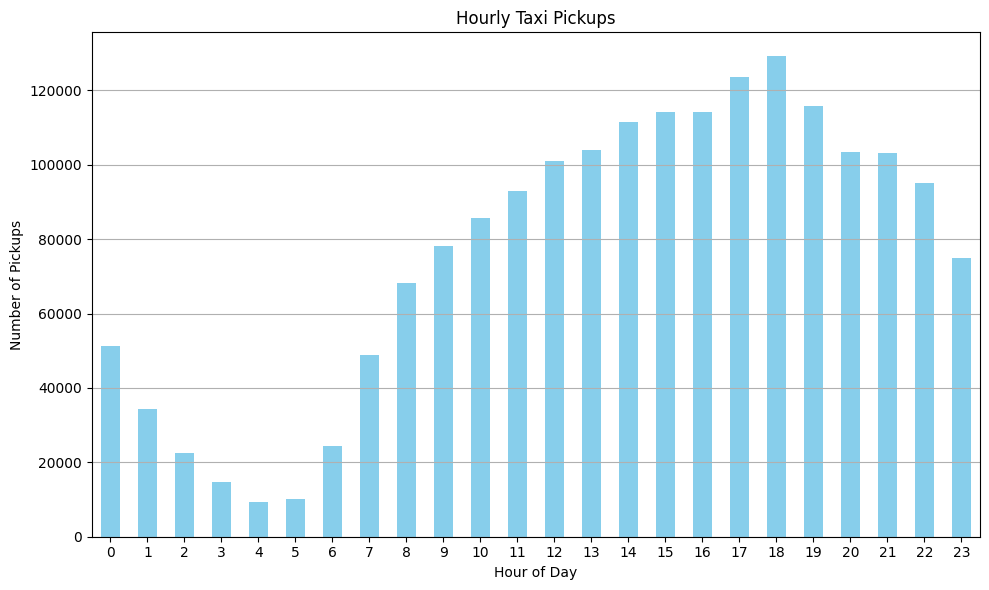

hour   count
18    18  129173
17    17  123545
19    19  115905
15    15  114281
16    16  114269
14    14  111542
13    13  104079
20    20  103426
21    21  103154
12    12  100978
22    22   95158
11    11   93020
10    10   85616
9      9   78271
23    23   74821
8      8   68267
0      0   51160
7      7   48980
1      1   34276
6      6   24466
2      2   22552
3      3   14707
5      5   10017
4      4    9436

In [47]:
# Find and show the hourly trends in taxi pickups
# Convert pickup and dropoff time into datetime format
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
# Extract hour from pick-up time
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count pickups per hour
hourly_counts = df['hour'].value_counts().sort_index()

# Plot
hourly_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Hourly Taxi Pickups")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
hourly_counts.reset_index().sort_values(by='count', ascending=False)

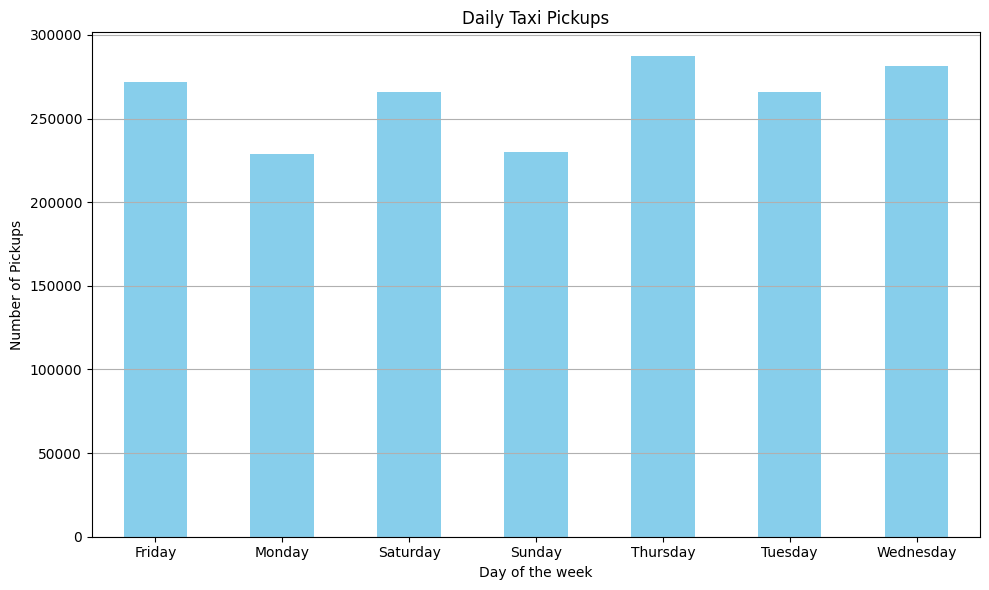

In [53]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Count pickups per day
daily_counts = df['day'].value_counts().sort_index()

# Plot
daily_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Daily Taxi Pickups")
plt.xlabel("Day of the week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [55]:
# Show the monthly trends in pickups
# Extract month
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Count pickups per hour
monthly_counts = df['month'].value_counts().sort_index()

# Plot
monthly_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Monthly Taxi Pickups")
plt.xlabel("Month of Year")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

monthly_counts.reset_index().sort_values(by='count', ascending=False)

month   count
8         May  168947
10    October  166501
7       March  164252
6        June  158965
9    November  158371
0       April  158354
2    December  157732
4     January  148438
3    February  140684
5        July  139704
1      August  135233
11  September  133918

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [57]:
# Analyse the above parameters
# List of key financial and distance columns
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values in each
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    total = df[col].shape[0]

    print(f"{col}:")
    print(f"  - Zero values: {zero_count} ({(zero_count / total) * 100:.2f}%)")
    print(f"  - Negative values: {negative_count} ({(negative_count / total) * 100:.2f}%)")
    print("----")


fare_amount:
  - Zero values: 261 (0.01%)
  - Negative values: 0 (0.00%)
----
tip_amount:
  - Zero values: 409928 (22.39%)
  - Negative values: 0 (0.00%)
----
total_amount:
  - Zero values: 0 (0.00%)
  - Negative values: 15 (0.00%)
----
trip_distance:
  - Zero values: 22743 (1.24%)
  - Negative values: 0 (0.00%)
----


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [59]:
# Create a df with non zero entries for the selected parameters.
# Create a filtered copy with non-zero, non-negative values
filtered_df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

# Display basic info
print(f"Original rows: {len(df)}")
print(f"Filtered rows (non-zero valid entries): {len(filtered_df)}")

# Preview the cleaned DataFrame
filtered_df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()
df=filtered_df


Original rows: 1831099
Filtered rows (non-zero valid entries): 1808159


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

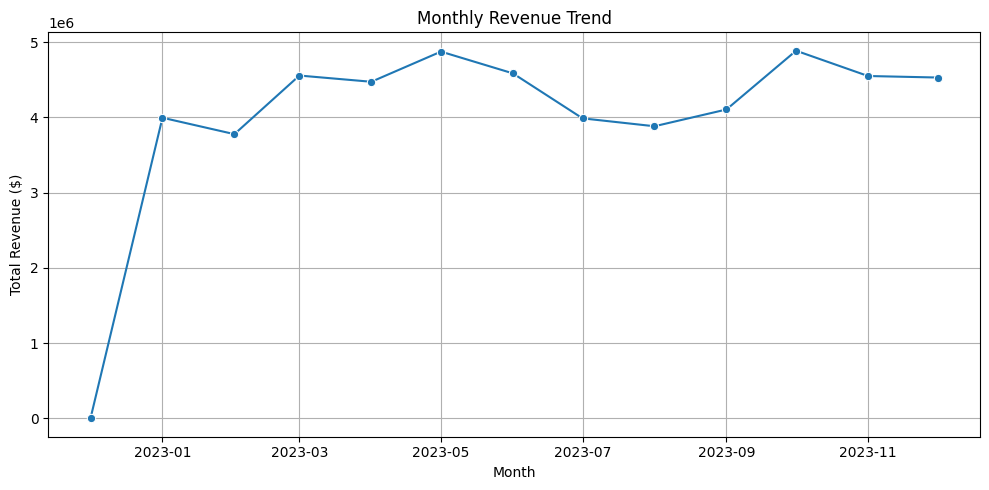

month  total_amount
10 2023-10-01    4885899.75
5  2023-05-01    4874048.74
6  2023-06-01    4584870.64
3  2023-03-01    4555917.28
11 2023-11-01    4549768.11
4  2023-04-01    4473127.74
9  2023-09-01    4104840.17
1  2023-01-01    3995173.81
7  2023-07-01    3987014.64
8  2023-08-01    3881958.16
2  2023-02-01    3777003.69
0  2022-12-01         13.50

In [61]:
# Group data by month and analyse monthly revenue

# Create a 'month' column
df['month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and sum total_amount to calculate revenue
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()

# Convert month back to datetime for plotting
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

# Plot monthly revenue trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_revenue.head(12).sort_values(by='total_amount', ascending=False)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   index quarter  total_amount    proportion
4      4  2023Q4   13965224.34  2.675372e-01
2      2  2023Q2   13932047.12  2.669016e-01
1      1  2023Q1   12328094.78  2.361741e-01
3      3  2023Q3   11973812.97  2.293869e-01
0      0  2022Q4         13.50  2.586247e-07


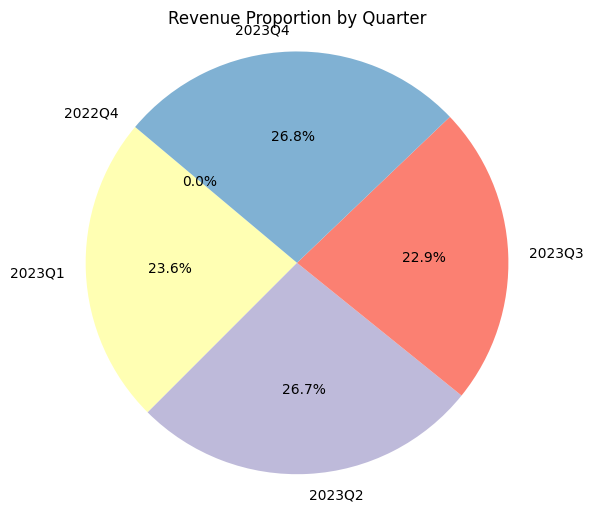

In [63]:
# Calculate proportion of each quarter

# Create a 'quarter' column
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()

# Display the proportions
print(quarterly_revenue.reset_index().sort_values(by='proportion', ascending=False))

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'].astype(str), 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Revenue Proportion by Quarter')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

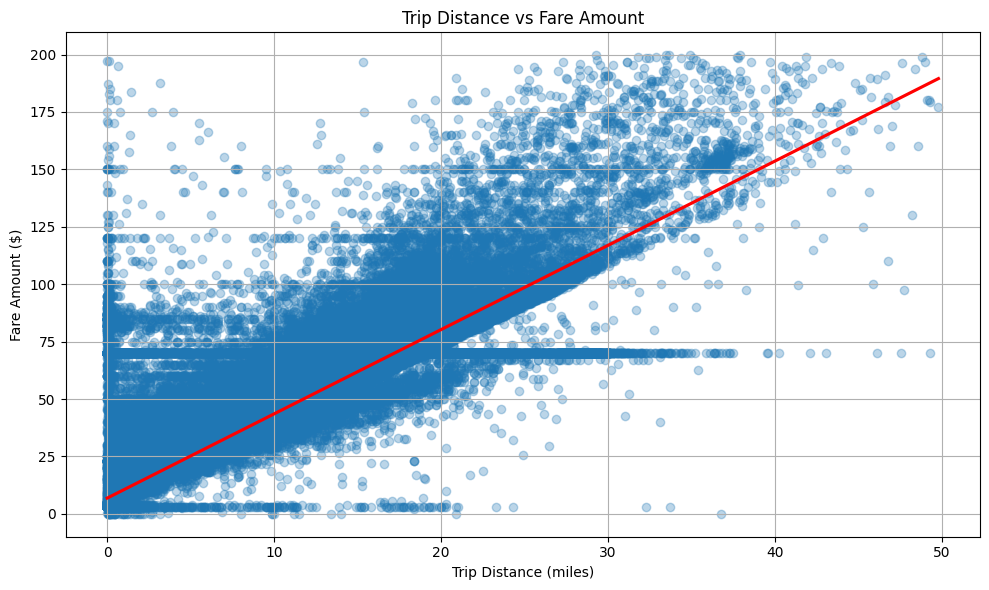

Correlation between trip distance and fare amount: 0.9485


In [65]:
# Show how trip fare is affected by distance
# Filter for realistic distances and fares to avoid extreme outliers
filtered = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 50) & 
              (df['fare_amount'] > 0) & (df['fare_amount'] < 200)]

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered, x='trip_distance', y='fare_amount', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute correlation
correlation = filtered['trip_distance'].corr(filtered['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

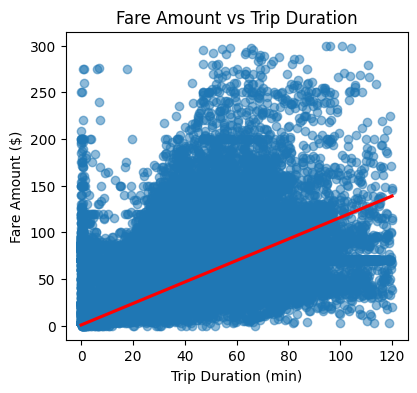

Correlation between trip duration and fare amount: 0.8535


In [66]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out extreme or invalid values for clean plots
df_filtered = df[
    ((df['fare_amount'] > 0) & (df['fare_amount'] < 300)) &
    (df['tip_amount'] >= 0) &
    (df['trip_distance'] > 0) &
    (df['passenger_count'] > 0) &
    (df['trip_duration_min'] > 0) &
    (df['trip_duration_min'] < 120)  # limit to 2-hour trips
].copy()

# Plot 1: fare_amount vs trip_duration
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.regplot(data=df_filtered, x='trip_duration_min', y='fare_amount', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Compute correlation
correlation = df_filtered['trip_duration_min'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.4f}")

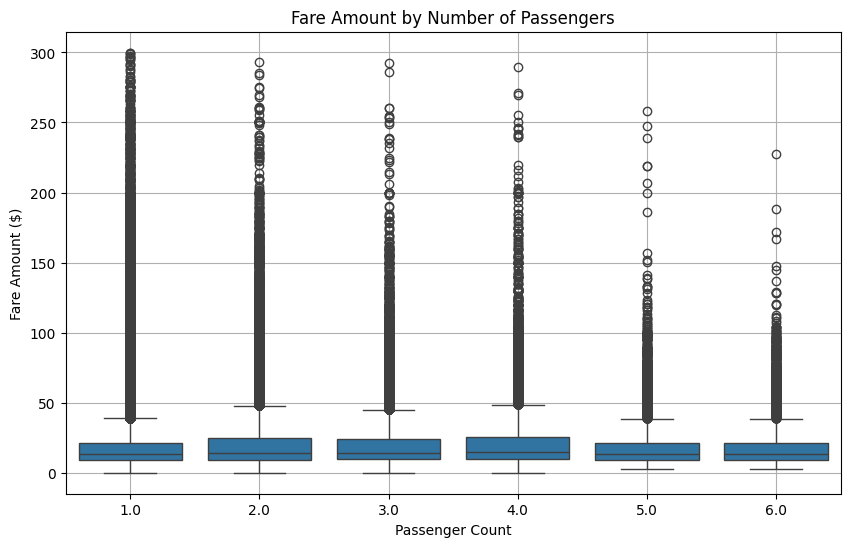

<Figure size 640x480 with 0 Axes>

Correlation Values:
  ▸ Fare Amount vs Passenger Count: 0.0434


In [67]:
# Show relationship between fare and number of passengers

df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]  # typical range
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 300)]        # realistic fare range
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount by Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

# Calculate and print correlation values
corr_fare_passengers = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])

print("Correlation Values:")
print(f"  ▸ Fare Amount vs Passenger Count: {corr_fare_passengers:.4f}")

In [68]:
# Show relationship between tip and trip distance
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 50)]
df = df[(df['tip_amount'] >= 0) & (df['tip_amount'] <= 100)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.3)
sns.regplot(x='trip_distance', y='tip_amount', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()

# Calculate and print correlation values
corr_fare_passengers = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])

print("Correlation Values:")
print(f"  ▸ Tip Amount vs trip distance: {corr_fare_passengers:.4f}")

Correlation Values:
  ▸ Tip Amount vs trip distance: 0.5915


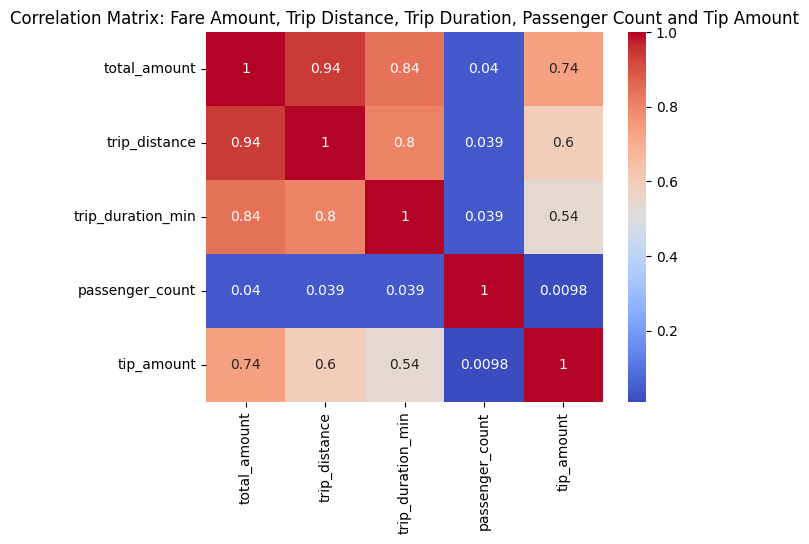

                   total_amount  trip_distance  trip_duration_min  \
total_amount           1.000000       0.938694           0.838393   
trip_distance          0.938694       1.000000           0.803445   
trip_duration_min      0.838393       0.803445           1.000000   
passenger_count        0.039600       0.038860           0.039094   
tip_amount             0.735064       0.596599           0.535634   

                   passenger_count  tip_amount  
total_amount              0.039600    0.735064  
trip_distance             0.038860    0.596599  
trip_duration_min         0.039094    0.535634  
passenger_count           1.000000    0.009790  
tip_amount                0.009790    1.000000  


In [349]:
# Correlation Matrix
filtered = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 50) & 
              (df['fare_amount'] > 0) & (df['fare_amount'] < 200) &(df['fare_amount'] > 0) & (df['fare_amount'] < 300) &
    (df['tip_amount'] >= 0) &
    (df['trip_distance'] > 0) &
    (df['passenger_count'] > 0) & (df['passenger_count'] <= 6) &
    (df['trip_duration_min'] > 0) &
    (df['trip_duration_min'] < 120)]

correlation_matrix = filtered[['total_amount', 'trip_distance', 'trip_duration_min', 'passenger_count', 'tip_amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Fare Amount, Trip Distance, Trip Duration, Passenger Count and Tip Amount')
plt.show()

print(correlation_matrix)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

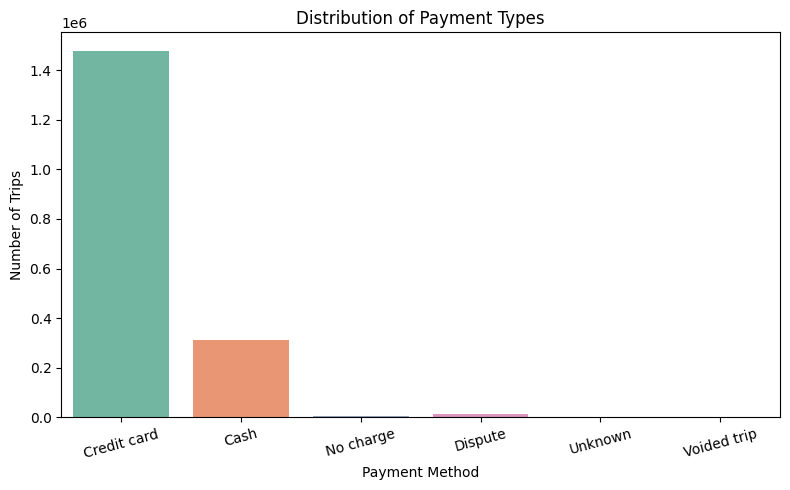

   index payment_type_name  payment_type      count  proportion
0      1       Credit card           1.0  1479124.0   81.815929
1      2              Cash           2.0   309742.0   17.132999
2      3         No charge           3.0     6792.0    0.375691
3      4           Dispute           4.0    12210.0    0.675381
4      5           Unknown           NaN        0.0    0.000000
5      6       Voided trip           NaN        0.0    0.000000


In [70]:
# Analyse the distribution of different payment types (payment_type).

# Count occurrences of each payment type
payment_counts = df['payment_type'].value_counts().reset_index()

# Optional: map codes to labels
payment_labels = pd.DataFrame([
    [1, 'Credit card'],
    [2, 'Cash'],
    [3, 'No charge'],
    [4, 'Dispute'],
    [5, 'Unknown'],
    [6, 'Voided trip']
], columns=['index','payment_type_name'])

payment_labels_df = payment_labels.merge(payment_counts, how='left', right_on='payment_type', left_on='index')
payment_labels_df['count']=payment_labels_df['count'].fillna(0)
payment_labels_df['proportion']=payment_labels_df['count']*100/payment_labels_df['count'].sum()
# Count with labels
# label_counts = df['payment_label'].value_counts()
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_labels_df['payment_type_name'], y=payment_labels_df['count'], palette="Set2")
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print(payment_labels_df.head(20))

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [77]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('C:/Users/ateeq/EDA-Assignment/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

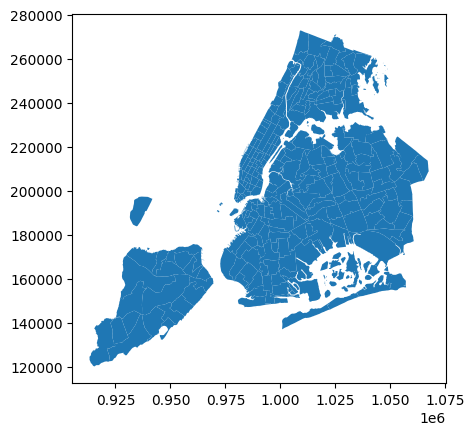

In [79]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [81]:
# Merge zones and trip records using locationID and PULocationID
trip_zones_df = df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
trip_zones_df.rename(columns={
    'Borough': 'PU_Borough', 
    'Zone': 'PU_Zone', 
    'service_zone': 'PU_ServiceZone'
}, inplace=True)
trip_zones_df.drop('LocationID', axis=1, inplace=True)
trip_zones_df


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1              1         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              2         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3              3         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4              5         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...          ...       ...                  ...                   ...   
1807970  1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20   
1807971  1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05   
1807972  1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42   
1807973  1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05   
1807974  1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           7.74         1.0                  N   
1                    2.0           1.24         1.0                  N   
2                    3.0           1.44         1.0                  N   
3                    1.0           0.54         1.0                  N   
4                    2.0           7.10         1.0                  N   
...                  ...            ...         ...                ...   
1807970              1.0           0.79         1.0                  N   
1807971              3.0           0.50         1.0                  N   
1807972              1.0           1.09         1.0                  N   
1807973              2.0          13.20         1.0                  N   
1807974              1.0           2.97         1.0                  N   

         PULocationID  DOLocationID  ...       day    month  quarter  \
0                 138           256  ...    Sunday  2023-01   2023Q1   
1                 161           237  ...    Sunday  2023-01   2023Q1   
2                 237           141  ...    Sunday  2023-01   2023Q1   
3                 143           142  ...    Sunday  2023-01   2023Q1   
4                 246            37  ...    Sunday  2023-01   2023Q1   
...               ...           ...  ...       ...      ...      ...   
1807970           231           231  ...  Saturday  2023-09   2023Q3   
1807971           158            68  ...  Saturday  2023-09   2023Q3   
1807972           161           162  ...  Saturday  2023-09   2023Q3   
1807973           164            14  ...  Saturday  2023-09   2023Q3   
1807974           231            68  ...  Saturday  2023-09   2023Q3   

         trip_duration_min  OBJECTID  Shape_Leng  Shape_Area  \
0                15.950000     138.0    0.107467    0.000537   
1                 5.083333     161.0    0.035804    0.000072   
2                10.550000     237.0    0.042213    0.000096   
3                 5.416667     143.0    0.054180    0.000151   
4                33.616667     246.0    0.069467    0.000281   
...                    ...       ...         ...         ...   
1807970           6.766667     231.0    0.063420    0.000167   
1807971           4.233333     158.0    0.054810    0.000186   
1807972           7.616667     161.0    0.035804    0.000072   
1807973          37.566667     164.0    0.035772    0.000056   
1807974          13.816667     231.0    0.063420    0.000167   

                                  zone    borough  \
0                    LaGuardia Airport     Queens   
1                       Midtown Center  Manhattan   
2                Upper East Side South  Manhattan   
3                  Lincoln Square West  Manhattan   
4            West Chelsea/Hudson Yards  Manhattan   
...                                ...        ...   
1807970           TriBeCa/Civic Center  Manhattan   
1807971  Meatpacking/West Village West  Manhattan   
1807972                 Midtown Center  Manhattan   
1807973                  Midtown South  Manhattan   
1807974           TriBeCa/Ci

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [355]:
# Group data by location and calculate the number of trips
group_by_loc_df=trip_zones_df.groupby(by='PULocationID').size().reset_index(name='trip_count')
group_by_loc_df.sort_values(by='trip_count', ascending=False).head(20)


PULocationID  trip_count
124           132       94791
227           237       86469
153           161       85397
226           236       77116
154           162       65205
130           138       63654
177           186       62985
220           230       60728
134           142       60506
162           170       54028
155           163       53407
229           239       50042
224           234       49074
46             48       48354
66             68       47360
133           141       43197
77             79       42675
156           164       42386
238           249       40201
101           107       38161

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [87]:
# Merge trip counts back to the zones GeoDataFrame
zones_count_df=zones.merge(group_by_loc_df, how='left', left_on='LocationID', right_on='PULocationID')
# Fill missing trip counts with 0
zones_count_df['trip_count'] = zones_count_df['trip_count'].fillna(0)
zones_count_df



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     PULocationID  trip_count  
0             1.0        47.0  
1             2.0         2.0  
2             3.0        31.0  
3             4.0      1814.0  
4             5.0         9.0  
..            ...         ...  
258         259.0        35.0  
259         260.0       302.0  
260         261.0      9502.0  
261         262.0     23485.0  
262         263.0     34662.0  

[263 rows x 9 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

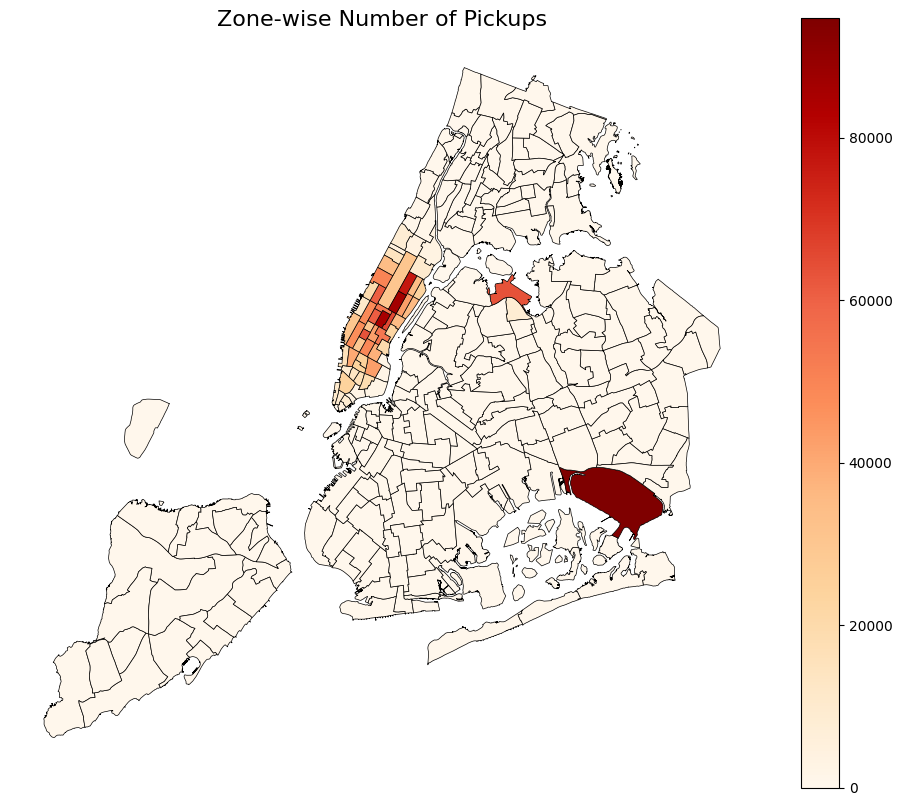

In [89]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_count_df.plot(column='trip_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)
plt.title('Zone-wise Number of Pickups', fontsize=16)
plt.axis('off')
plt.show()


In [91]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones_counts_df = zones_count_df.sort_values(by='trip_count', ascending=False)
sorted_zones_counts_df.head(10)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     PULocationID  trip_count  
131         132.0     94792.0  
236         237.0     86473.0  
160         161.0     85399.0  
235         236.0     77119.0  
161         162.0     65208.0  
137         138.0     63654.0  
185         186.0     62987.0  
229         230.0     60728.0  
141         142.0     60506.0  
169         170.0     54031.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [100]:
# Find routes which have the slowest speeds at different times of the day

# Calculate duration in hours
trip_zones_df['trip_duration_hours'] = (trip_zones_df['tpep_dropoff_datetime'] - trip_zones_df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Remove zero or negative durations to avoid division errors
trip_zones_df = trip_zones_df[trip_zones_df['trip_duration_hours'] > 0]

# Calculate average speed (miles per hour)
trip_zones_df['speed_mph'] = trip_zones_df['trip_distance'] / trip_zones_df['trip_duration_hours']

# Extract hour of the day
trip_zones_df['hour'] = trip_zones_df['tpep_pickup_datetime'].dt.hour

# Group by hour and route(PU+DO)
slowest_routes = (
    trip_zones_df.groupby(['hour',  'PULocationID', 'DOLocationID'])
    .agg(avg_speed=('speed_mph', 'mean'), trip_count=('speed_mph', 'count'))
    .reset_index()
)

# Filter routes with a minimum number of trips (e.g. 10)
slowest_routes = slowest_routes[slowest_routes['trip_count'] >= 10]

# For each hour, get the slowest route
slowest_per_hour = slowest_routes.sort_values(['hour', 'avg_speed']).groupby('hour').first().reset_index()
print('Top 5 slowest routes are as follows')
print(slowest_per_hour)

Top 5 slowest routes are as follows
    hour  PULocationID  DOLocationID  avg_speed  trip_count
0      0           144           144   6.468023          12
1      1           158           158   6.534512          16
2      2           231           231   6.172582          17
3      3           148           144   7.491339          21
4      4           237           140   7.632492          21
5      5           100           170   8.973108          14
6      6           230           230   6.822388          13
7      7           100           100   6.723639          22
8      8           100           100   5.428009          14
9      9           164           100   4.909977          22
10    10           186           100   4.196040          71
11    11           100           100   3.891199          24
12    12           186           100   3.483702          78
13    13           186           100   3.909248          95
14    14           162           230   4.255962         126
15  

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

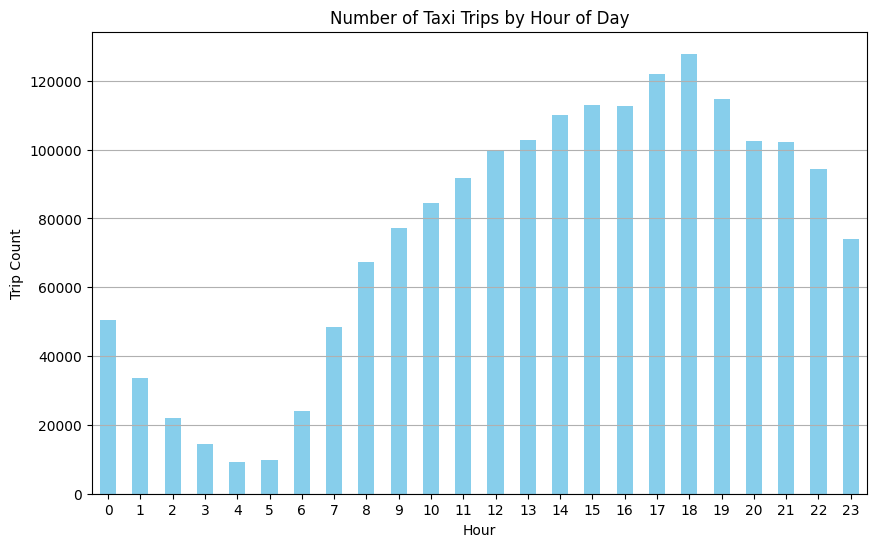

Busiest hour: 18:00 with 127853 trips


In [103]:
# Visualise the number of trips per hour and find the busiest hour
hourly_counts = trip_zones_df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Taxi Trips by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Trip Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Find busiest hour
busiest_hour = hourly_counts.idxmax()
print(f"Busiest hour: {busiest_hour}:00 with {hourly_counts.max()} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [106]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction=20 #1/0.05

hourly_scaled = hourly_counts * sample_fraction
print(hourly_scaled.sort_values(ascending=False).head())



hour
18    2557060
17    2440940
19    2295900
15    2256160
16    2254320
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [108]:
# Compare traffic trends for the week days and weekends

# Extract weekday and hour
trip_zones_df['weekday'] = trip_zones_df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
trip_zones_df['hour'] = trip_zones_df['tpep_pickup_datetime'].dt.hour

#Label Weekday vs Weekend
trip_zones_df['day_type'] = trip_zones_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


# Group by day type and hour
hourly_trends = trip_zones_df.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')

#Plot the comparison
plt.figure(figsize=(10, 6))

for label, group in hourly_trends.groupby('day_type'):
    plt.plot(group['hour'], group['trip_count'], label=label)

plt.title("Taxi Trip Trends: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

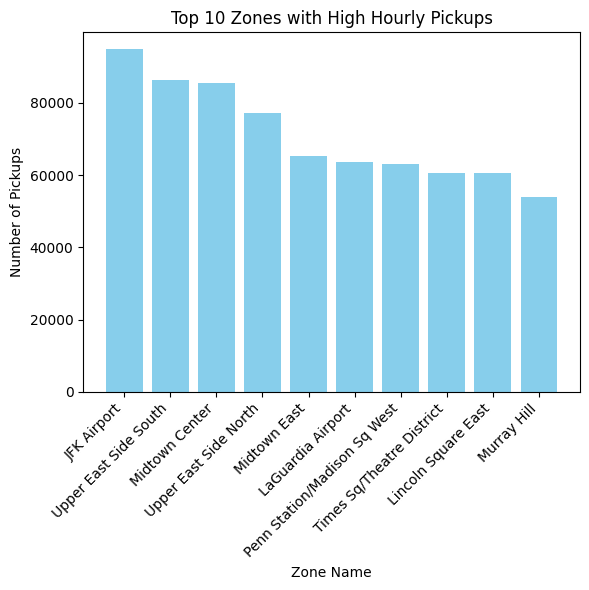

Top 10 pickup zones on an hourly basis
    hour  PULocationID  pickup_count  LocationID                          zone
0      0           132          3874         132                   JFK Airport
1      0           138          1605         138             LaGuardia Airport
2      0           142          1113         142           Lincoln Square East
3      0           161          1393         161                Midtown Center
4      0           162           995         162                  Midtown East
5      0           170           988         170                   Murray Hill
6      0           186          1686         186  Penn Station/Madison Sq West
7      0           230          1900         230     Times Sq/Theatre District
8      0           236           401         236         Upper East Side North
9      0           237           912         237         Upper East Side South
10     1           132          1821         132                   JFK Airport
11     1     

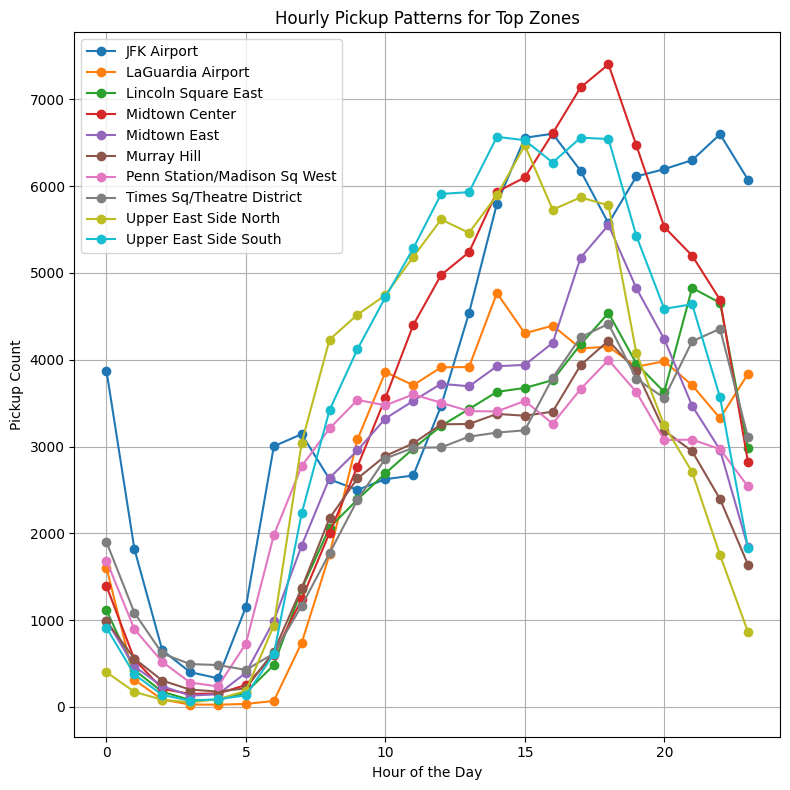

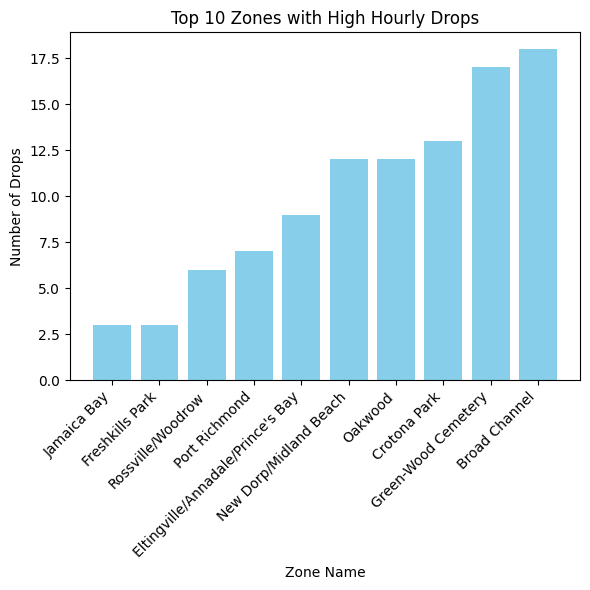

Top 10 dropoff zones on an hourly basis
    hour  DOLocationID  dropoff_count                               zone
0      0            30              1                      Broad Channel
1      0            59              1                       Crotona Park
2      0            84              2  Eltingville/Annadale/Prince's Bay
3      0            99              1                    Freshkills Park
4      0           111              1                Green-Wood Cemetery
5      0           172              1             New Dorp/Midland Beach
6      1            84              1  Eltingville/Annadale/Prince's Bay
7      4           111              1                Green-Wood Cemetery
8      6            30              1                      Broad Channel
9      6            84              1  Eltingville/Annadale/Prince's Bay
10     6           176              2                            Oakwood
11     7           111              1                Green-Wood Cemetery
12     8   

In [110]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup zones
top_pickups = trip_zones_df['PULocationID'].value_counts().reset_index()
top_pickups.columns = ['LocationID', 'pickup_count']

# Join with zone names
top_pickups = top_pickups.merge(zones[['zone', 'LocationID']], on='LocationID', how='left')
top_pickups=top_pickups.rename(columns={'zone':'pickup_zone'})
# print('Top 10 pickups location ')
# print(top_pickups.head(10))
zone_column = 'PULocationID'

top_pickups['pickup_count']=top_pickups['pickup_count'].fillna(0)


# Get top 10 zones
top_zones = top_pickups.sort_values(by='pickup_count', ascending=False).head(10)
# print(top_zones[['zone', 'pickup_count']])

# Visualize top 10 zones
plt.figure(figsize=(6, 6))
plt.bar(top_zones['pickup_zone'], top_zones['pickup_count'], color='skyblue')
plt.xlabel('Zone Name')
plt.ylabel('Number of Pickups')
plt.title('Top 10 Zones with High Hourly Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Time-based analysis (if hour column is available)
if 'hour' in trip_zones_df.columns:
    top_zone_ids = top_zones['LocationID'].tolist()
    hourly_counts = trip_zones_df[trip_zones_df[zone_column].isin(top_zone_ids)].groupby(['hour', zone_column]).size().reset_index(name='pickup_count')
    
    # Merge zone names for plotting
    hourly_counts = hourly_counts.merge(zones[['LocationID', 'zone']], left_on=zone_column, right_on='LocationID')
    
    # Plot hourly pickup patterns for top zones
    plt.figure(figsize=(8, 8))
    for zone in hourly_counts['zone'].unique():
        zone_data = hourly_counts[hourly_counts['zone'] == zone]
        plt.plot(zone_data['hour'], zone_data['pickup_count'], marker='o', label=zone)

    print('Top 10 pickup zones on an hourly basis')
    print(hourly_counts.head(24))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Pickup Count')
    plt.title('Hourly Pickup Patterns for Top Zones')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# # Top 10 dropoff zones
top_dropoffs = trip_zones_df['DOLocationID'].value_counts().reset_index()
top_dropoffs.columns = ['LocationID', 'dropoff_count']

# # Join with zone names
top_dropoffs = top_dropoffs.merge(zones[['zone', 'LocationID']], on='LocationID', how='left')
top_dropoffs=top_dropoffs.rename(columns={'zone':'dropoff_zone'})
# print('Top 10 dropoff location ')
# print(top_dropoffs.head(10))

# Get top 10 zones
top_ten_droppoff_zones = top_dropoffs.sort_values(by='dropoff_count', ascending=True).head(10)
# print(top_zones[['zone', 'pickup_count']])
zone_column = 'DOLocationID'

# Visualize top 10 zones
plt.figure(figsize=(6, 6))
plt.bar(top_ten_droppoff_zones['dropoff_zone'], top_ten_droppoff_zones['dropoff_count'], color='skyblue')
plt.xlabel('Zone Name')
plt.ylabel('Number of Drops')
plt.title('Top 10 Zones with High Hourly Drops')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Time-based analysis (if hour column is available)
if 'hour' in trip_zones_df.columns:
    top_zone_ids = top_ten_droppoff_zones['LocationID'].tolist()
    hourly_counts = trip_zones_df[trip_zones_df[zone_column].isin(top_zone_ids)].groupby(['hour', zone_column]).size().reset_index(name='dropoff_count')
    
    # Merge zone names for plotting
    hourly_counts = hourly_counts.merge(zones[['LocationID', 'zone']], left_on=zone_column, right_on='LocationID')
    
    # Plot hourly pickup patterns for top zones
    plt.figure(figsize=(8, 8))
    for zone in hourly_counts['zone'].unique():
        zone_data = hourly_counts[hourly_counts['zone'] == zone]
        plt.plot(zone_data['hour'], zone_data['dropoff_count'], marker='o', label=zone)

    print('Top 10 dropoff zones on an hourly basis')
    print(hourly_counts[['hour', 'DOLocationID', 'dropoff_count', 'zone']].head(24))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Dropoff Count')
    plt.title('Hourly Dropoffs Patterns for Top Zones')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

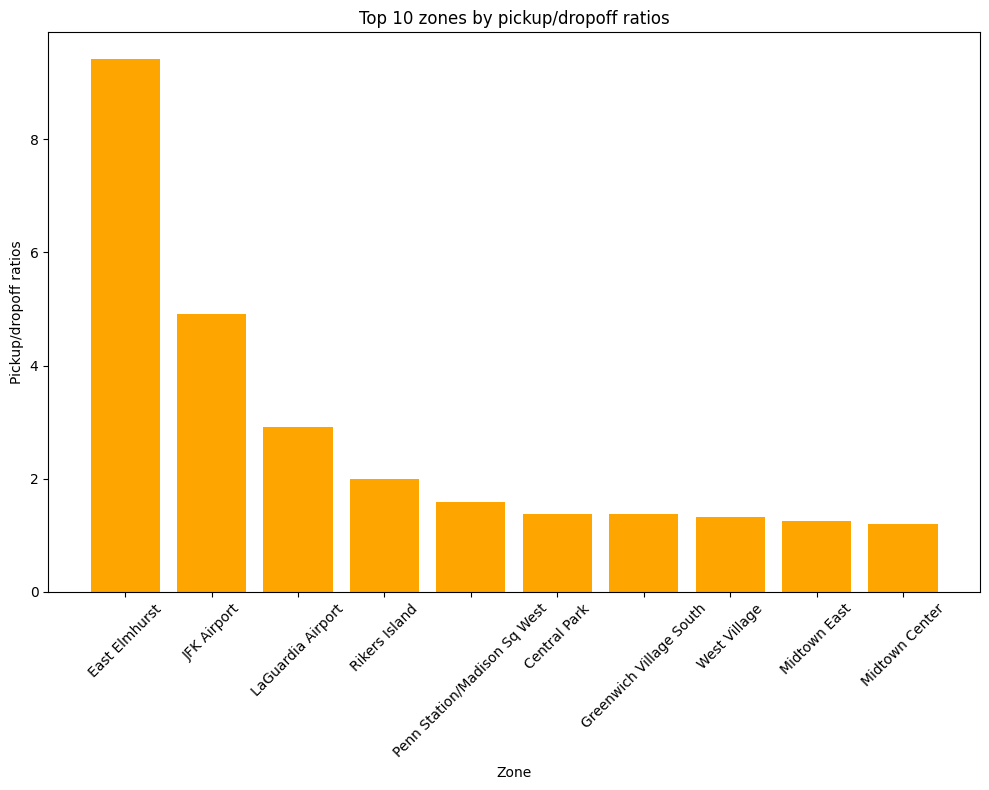

Top 10 zones by pickup/dropoff ratios :
                             zone  pickup_dropoff_ratio
47                  East Elmhurst              9.418872
0                     JFK Airport              4.905351
5               LaGuardia Airport              2.921651
244                 Rikers Island              2.000000
6    Penn Station/Madison Sq West              1.584130
24                   Central Park              1.375944
30        Greenwich Village South              1.375681
18                   West Village              1.328168
4                    Midtown East              1.257449
2                  Midtown Center              1.200188
Bottom 10 zones by pickup/dropoff ratios
                                    zone  pickup_dropoff_ratio
261                      Freshkills Park              0.000000
259                        Broad Channel              0.000000
258                          Great Kills              0.000000
257                        West Brighton           

In [114]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#count pickup and drops per zone
pickup_counts = trip_zones_df['PULocationID'].value_counts().rename("pickup_count")
dropoff_counts = trip_zones_df['DOLocationID'].value_counts().rename("dropoff_count")

#Combine and compute Ratio
zone_stats = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
zone_stats['pickup_dropoff_ratio'] = zone_stats['pickup_count'] / (zone_stats['dropoff_count'] + 1)


#Add zone names
zone_stats = zone_stats.reset_index().rename(columns={'index': 'LocationID'})
zone_stats = zone_stats.merge(zones[['zone', 'LocationID']], on='LocationID', how='left')

# Sort and extract top/bottom 10
top10 = zone_stats.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = zone_stats.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Plot: Bar chart of top 10 zones by pickup/dropoff ratios
top_zones = top10[['zone', 'pickup_dropoff_ratio']].sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(top_zones['zone'].astype(str), top_zones['pickup_dropoff_ratio'], color='orange')
plt.xlabel('Zone')
plt.ylabel('Pickup/dropoff ratios')
plt.title('Top 10 zones by pickup/dropoff ratios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Bar chart of bottom 10 zones by pickup/dropoff ratios
bottom_zones = bottom10[['zone', 'pickup_dropoff_ratio']].sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(bottom_zones['zone'].astype(str), bottom_zones['pickup_dropoff_ratio'], color='red')
plt.xlabel('Zone')
plt.ylabel('Pickup/dropoff ratios')
plt.title('Bottom 10 zones by pickup/dropoff ratios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 zones by pickup/dropoff ratios :")
print(top10[['zone', 'pickup_dropoff_ratio']])
print("Bottom 10 zones by pickup/dropoff ratios")
print(bottom10[['zone', 'pickup_dropoff_ratio']])


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 pickup zones during night hours
                           zone  pickup_count
0                  East Village         15428
1                   JFK Airport         14309
2                  West Village         12389
3                  Clinton East         10362
4               Lower East Side          9554
5       Greenwich Village South          8694
6     Times Sq/Theatre District          8115
7  Penn Station/Madison Sq West          6892
8                 Midtown South          6078
9                  East Chelsea          5955


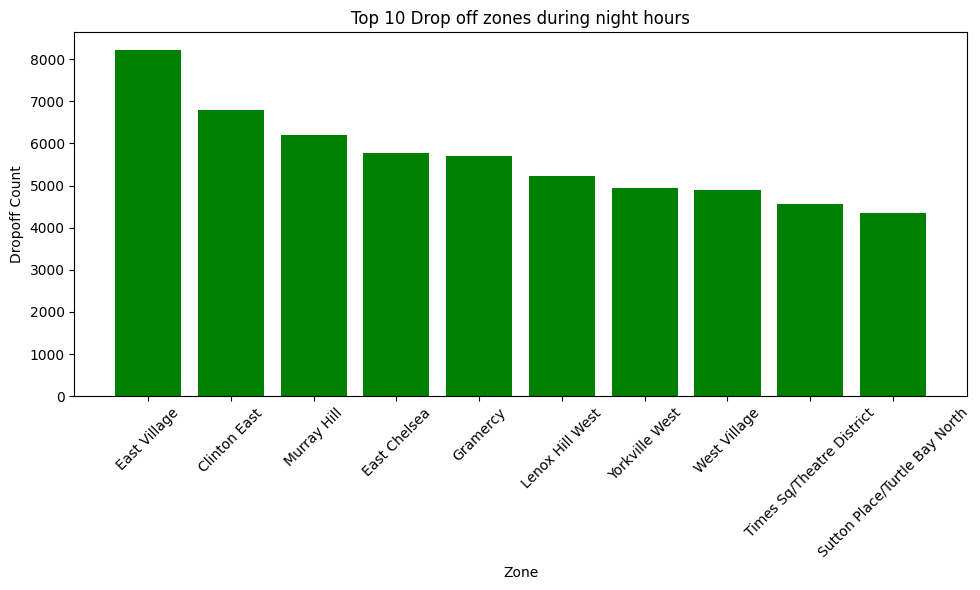

Top 10 dropoff zones during night hours
                            zone  dropoff_count
0                   East Village           8225
1                   Clinton East           6793
2                    Murray Hill           6194
3                   East Chelsea           5765
4                       Gramercy           5692
5                Lenox Hill West           5225
6                 Yorkville West           4934
7                   West Village           4883
8      Times Sq/Theatre District           4562
9  Sutton Place/Turtle Bay North           4337


In [116]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for Night Hours (11 PM to 5 AM)
night_df = trip_zones_df[(trip_zones_df['hour'] >= 23) | (trip_zones_df['hour'] <= 5)]

# Get Top 10 Pickup Zones
pickup_counts = night_df['PULocationID'].value_counts().head(10).reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Get Top 10 Dropoff Zones
dropoff_counts = night_df['DOLocationID'].value_counts().head(10).reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge with Zone Names (Optional)
top_pickup_zones = pickup_counts.merge(zones[['zone', 'LocationID']], on='LocationID', how='left')
top_dropoff_zones = dropoff_counts.merge(zones[['zone', 'LocationID']], on='LocationID', how='left')

# Plot: Bar chart of top 10 zones by pickup during night hours
top_pickup_zones = top_pickup_zones[['zone', 'pickup_count']].sort_values(by='pickup_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_pickup_zones['zone'].astype(str), top_pickup_zones['pickup_count'], color='orange')
plt.xlabel('Zone')
plt.ylabel('Pickup Count')
plt.title('Top 10 pick up zones during night hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Top 10 pickup zones during night hours')
print(top_pickup_zones.head(10))

# Plot: Bar chart of top 10 zones by drop offs during night hours
top_dropoff_zones = top_dropoff_zones[['zone', 'dropoff_count']].sort_values(by='dropoff_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_dropoff_zones['zone'].astype(str), top_dropoff_zones['dropoff_count'], color='green')
plt.xlabel('Zone')
plt.ylabel('Dropoff Count')
plt.title('Top 10 Drop off zones during night hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Top 10 dropoff zones during night hours')
print(top_dropoff_zones.head(10))



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

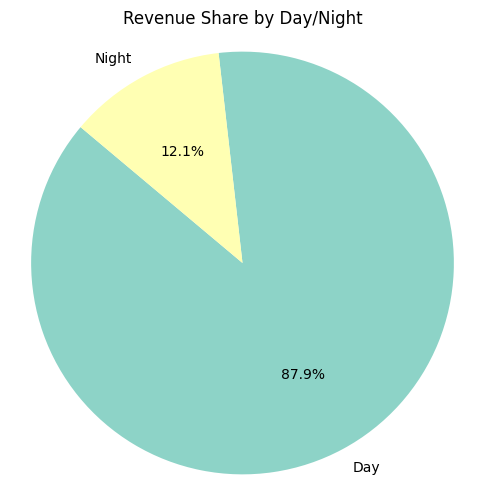

  Time_Period  Revenue_Share
0         Day      87.916493
1       Night      12.083507


In [118]:
# Filter for night hours (11 PM to 5 AM)

# Label each row as 'Night' or 'Day'
trip_zones_df['time_period'] = trip_zones_df['hour'].apply(lambda h: 'Night' if (h >= 23 or h <= 5) else 'Day')

# Sum fare amounts for each period
revenue_share = trip_zones_df.groupby('time_period')['fare_amount'].sum()

# Calculate percent share
revenue_share_pct = (revenue_share / revenue_share.sum()) * 100
revenue_share_pct=revenue_share_pct.reset_index()
revenue_share_pct.columns=['Time_Period', 'Revenue_Share']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_share_pct['Revenue_Share'], labels=revenue_share_pct['Time_Period'].astype(str), 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Revenue Share by Day/Night')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

print(revenue_share_pct.head(2))


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [120]:
# Analyse the fare per mile per passenger for different passenger counts

# Clean and preprocess
trip_zones_df['fare_amount'] = pd.to_numeric(trip_zones_df['fare_amount'], errors='coerce')
trip_zones_df['trip_distance'] = pd.to_numeric(trip_zones_df['trip_distance'], errors='coerce')
trip_zones_df['passenger_count'] = pd.to_numeric(trip_zones_df['passenger_count'], errors='coerce')

# Calculate fare per mile per passenger
trip_zones_df['fare_per_mile_per_passenger'] = trip_zones_df['fare_amount'] / (trip_zones_df['trip_distance'] * trip_zones_df['passenger_count'])

# Analyze by passenger count
result = trip_zones_df.groupby('passenger_count')['fare_per_mile_per_passenger'].describe().reset_index()
result_per_mile_per_passenger= result[['passenger_count', 'mean']]
result_per_mile_per_passenger.columns=['passenger_count', 'fare_per_mile_per_passenger']

plt.figure(figsize=(10,6))
plt.bar(result_per_mile_per_passenger['passenger_count'].astype(str), result_per_mile_per_passenger['fare_per_mile_per_passenger'], color='green')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per mile per passenger')
plt.title('Fare per mile per passenger for different passenger counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print('Fare per mile per passenger for different passenger counts')
print(result_per_mile_per_passenger[['passenger_count', 'fare_per_mile_per_passenger']].head(6))




Fare per mile per passenger for different passenger counts
   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.837060
1              2.0                     6.430726
2              3.0                     3.900546
3              4.0                     4.362465
4              5.0                     1.709668
5              6.0                     1.350823


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [122]:
# Compare the average fare per mile for different days and for different times of the day

trip_zones_df['fare_per_mile'] = trip_zones_df['fare_amount'] / df['trip_distance']

# Extract day of week (0=Monday) and hour
trip_zones_df['day_of_week'] = trip_zones_df['tpep_pickup_datetime'].dt.day_name()

# Define time of day segments (e.g., Morning, Afternoon, Evening, Night)
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

trip_zones_df['time_of_day'] = trip_zones_df['hour'].apply(time_of_day)

# Group by day of week and time of day to find average fare per mile
avg_fare = trip_zones_df.groupby(['day_of_week', 'time_of_day'])['fare_per_mile'].mean().reset_index()
avg_fare.columns=['day_of_week', 'time_of_day','average_fare_per_mile']

# Optional: Sort days for better display order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare['day_of_week'] = pd.Categorical(avg_fare['day_of_week'], categories=days_order, ordered=True)
time_period_order=['Morning', 'Afternoon', 'Evening', 'Night']
avg_fare['time_of_day'] = pd.Categorical(avg_fare['time_of_day'], categories=time_period_order, ordered=True)
avg_fare = avg_fare.sort_values(['day_of_week', 'time_of_day'])

print('The average fare per mile for different days and for different times of the day:\n')
print(avg_fare)



The average fare per mile for different days and for different times of the day:

   day_of_week time_of_day  average_fare_per_mile
6       Monday     Morning              15.401242
4       Monday   Afternoon              16.953637
5       Monday     Evening              15.714189
7       Monday       Night              18.344074
22     Tuesday     Morning              15.667539
20     Tuesday   Afternoon              16.738104
21     Tuesday     Evening              15.184826
23     Tuesday       Night              16.551577
26   Wednesday     Morning              15.465447
24   Wednesday   Afternoon              16.787721
25   Wednesday     Evening              15.200770
27   Wednesday       Night              15.914231
18    Thursday     Morning              15.487078
16    Thursday   Afternoon              16.839957
17    Thursday     Evening              15.339616
19    Thursday       Night              15.982190
2       Friday     Morning              15.965305
0       Friday   A

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

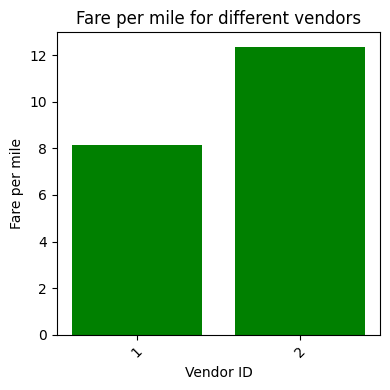


Fare per mile for different vendors

   VendorID  fare_per_mile
0         1       8.129823
1         2      12.373500


In [124]:
# Compare fare per mile for different vendors

# Calculate fare per mile
trip_zones_df['fare_per_mile'] = trip_zones_df['fare_amount'] / trip_zones_df['trip_distance']

# Group by VendorID and calculate average fare per mile
vendor_fare = trip_zones_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(4,4))
plt.bar(vendor_fare['VendorID'].astype(str), vendor_fare['fare_per_mile'], color='green')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per mile')
plt.title('Fare per mile for different vendors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\nFare per mile for different vendors\n')
print(vendor_fare)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [126]:
# Defining distance tiers

def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

trip_zones_df['distance_tier'] = trip_zones_df['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier and calculate average fare per mile
tiered_fare = trip_zones_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
# Pivot for nicer display
tiered_fare_pivot = tiered_fare.pivot(index='VendorID', columns='distance_tier', values='fare_per_mile')

print(tiered_fare_pivot)


distance_tier  2 to 5 miles  More than 5 miles  Up to 2 miles
VendorID                                                     
1                  6.381354           4.424782       9.927420
2                  6.549074           4.502641      17.871431


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?


Average Tip % by Trip Distance

  distance_bin    tip_pct
0    0-2 miles  12.145485
1    2-5 miles  12.290089
2     >5 miles  11.311887



Average Tip % by Passenger Count

   passenger_count    tip_pct
0              1.0  12.163564
1              2.0  11.787705
2              3.0  11.355940
3              4.0  10.494597
4              5.0  12.135243


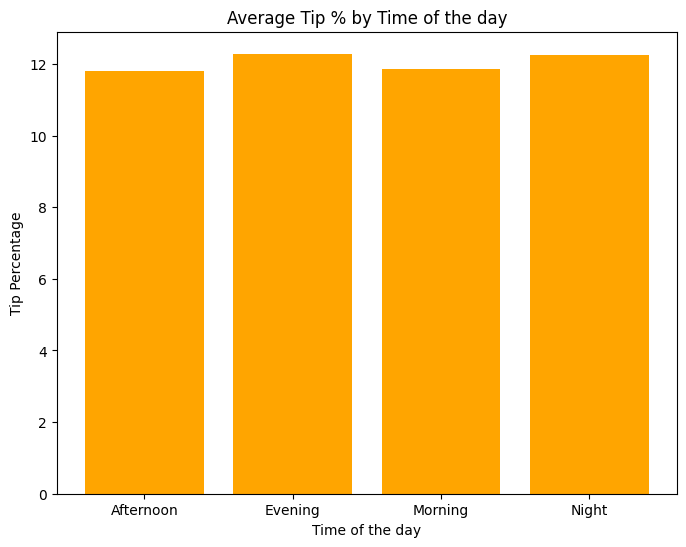

Average Tip % by Time of the day

  time_of_day    tip_pct
0   Afternoon  11.801468
1     Evening  12.286285
2     Morning  11.863165
3       Night  12.256848

Below top 10 factors lead to low tip count

   distance_bin  passenger_count  hour  low_tip_count
18    0-2 miles              1.0    18          20168
17    0-2 miles              1.0    17          19433
15    0-2 miles              1.0    15          18706
16    0-2 miles              1.0    16          18583
14    0-2 miles              1.0    14          18198
19    0-2 miles              1.0    19          17660
13    0-2 miles              1.0    13          17644
12    0-2 miles              1.0    12          17202
11    0-2 miles              1.0    11          16190
10    0-2 miles              1.0    10          14804


In [158]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
trip_zones_df['tip_pct'] = (trip_zones_df['tip_amount'] / trip_zones_df['total_amount']) * 100

# Bin trip distances
def distance_bin(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

# Extract pickup hour and define time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

trip_zones_df['distance_bin'] = trip_zones_df['trip_distance'].apply(distance_bin)
tip_pct_by_trip_dist=trip_zones_df.groupby(['distance_bin'])['tip_pct'].mean().reset_index()
tip_pct_by_passenger_counts=trip_zones_df.groupby(['passenger_count'])['tip_pct'].mean().reset_index().head()
trip_zones_df['time_of_day'] = trip_zones_df['hour'].apply(time_of_day)
tip_pct_by_time_of_day=trip_zones_df.groupby(['time_of_day'])['tip_pct'].mean().reset_index()


# Plot average tip % by distance
plt.figure(figsize=(8,6))
plt.bar(tip_pct_by_trip_dist['distance_bin'].astype(str), tip_pct_by_trip_dist['tip_pct'], color='teal')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Distance Bin (miles)')
plt.ylabel('Tip Percentage')
plt.show()
print('\nAverage Tip % by Trip Distance\n')
print(tip_pct_by_trip_dist)

# Plot average tip % by passenger count
plt.figure(figsize=(8,6))
plt.bar(tip_pct_by_passenger_counts['passenger_count'].astype(str), tip_pct_by_passenger_counts['tip_pct'], color='orange')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()
print('\nAverage Tip % by Passenger Count\n')
print(tip_pct_by_passenger_counts)

# Plot average tip % by Time of the day
plt.figure(figsize=(8,6))
plt.bar(tip_pct_by_time_of_day['time_of_day'].astype(str), tip_pct_by_time_of_day['tip_pct'], color='orange')
plt.title('Average Tip % by Time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Tip Percentage')
plt.show()
print('Average Tip % by Time of the day\n')
print(tip_pct_by_time_of_day)

# Identify factors contributing to low tip percentages
low_tip_trips = trip_zones_df[trip_zones_df['tip_pct'] < trip_zones_df['tip_pct'].mean()]
low_tip_factors = low_tip_trips.groupby(['distance_bin', 'passenger_count', 'hour']).size().reset_index(name='low_tip_count')
print('\nBelow top 10 factors lead to low tip count\n')
print(low_tip_factors.sort_values(by='low_tip_count', ascending=False).head(10))



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Summary statistics for low vs high tips:
          tip_category trip_distance                  passenger_count         \
                                mean median       std            mean median   
0       Low Tip (<10%)      3.656301   1.81  4.780391        1.411645    1.0   
1  Medium Tip (10-25%)           NaN    NaN       NaN             NaN    NaN   
2      High Tip (>25%)      2.330101   1.15  3.508521        1.380304    1.0   

            fare_amount                   tip_amount                    \
        std        mean median        std       mean median        std   
0  0.897997   20.403828   14.2  18.937757   0.667147    0.0   1.304020   
1       NaN         NaN    NaN        NaN        NaN    NaN        NaN   
2  0.859434   14.337668    9.3  14.422009  11.270586    7.0  12.440483   

        hour         
        mean median  
0  14.046826   15.0  
1        NaN    NaN  
2  13.577265   14.0  

Trips by time of day and tip category:
time_of_day          Afternoon  Eveni

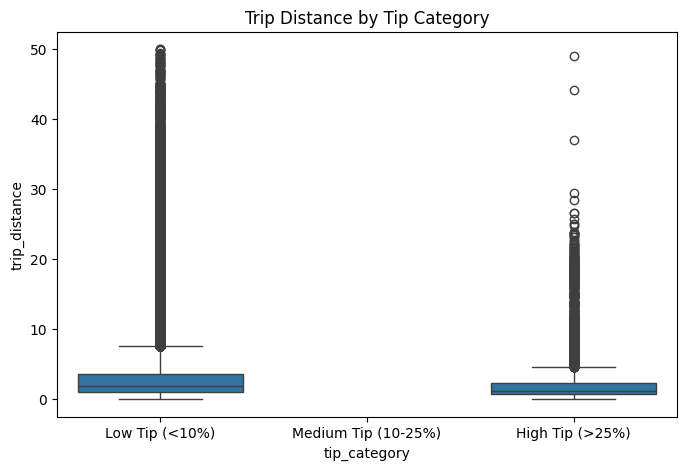

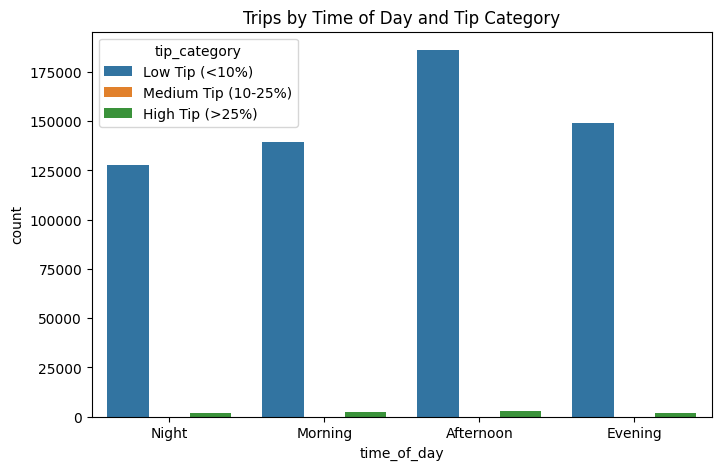

In [160]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Assuming df is preloaded and preprocessed with 'tip_pct' calculated
trip_zones_df['tip_category'] = pd.cut(trip_zones_df['tip_pct'],
                           bins=[-1, 10, 25, 100],
                           labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)'])
# Filter only low and high tip categories
df_filtered = trip_zones_df[trip_zones_df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

# Compare key variables by tip category
summary = df_filtered.groupby('tip_category').agg({
    'trip_distance': ['mean', 'median', 'std'],
    'passenger_count': ['mean', 'median', 'std'],
    'fare_amount': ['mean', 'median', 'std'],
    'tip_amount': ['mean', 'median', 'std'],
    'hour': ['mean', 'median'],
}).reset_index()

print("Summary statistics for low vs high tips:")
print(summary)

#Analyze categorical variables like time of day, day of week
# Time of day distribution
time_dist = df_filtered.groupby(['tip_category', 'time_of_day']).size().unstack(fill_value=0)

# Day of week distribution
df_filtered['day_of_week'] = df_filtered['tpep_pickup_datetime'].dt.day_name()
day_dist = df_filtered.groupby(['tip_category', 'day_of_week']).size().unstack(fill_value=0)

print("\nTrips by time of day and tip category:")
print(time_dist)

print("\nTrips by day of week and tip category:")
print(day_dist)

# Boxplot of trip distance by tip category
plt.figure(figsize=(8,5))
sns.boxplot(x='tip_category', y='trip_distance', data=df_filtered)
plt.title('Trip Distance by Tip Category')
plt.show()

# Countplot of time_of_day by tip category
plt.figure(figsize=(8,5))
sns.countplot(x='time_of_day', hue='tip_category', data=df_filtered)
plt.title('Trips by Time of Day and Tip Category')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

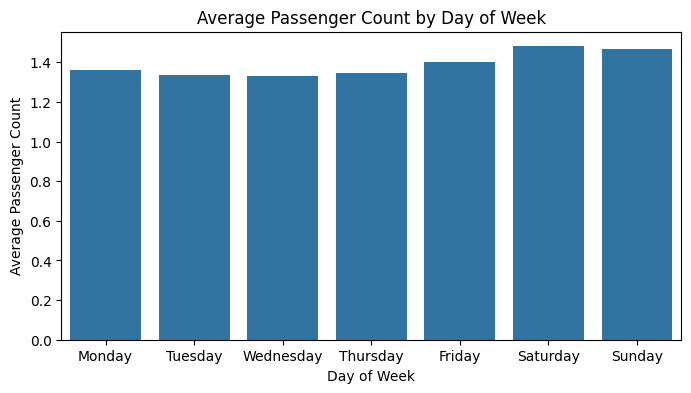

In [162]:
# See how passenger count varies across hours and days

# Group by hour and calculate average passenger count
hourly_passenger_avg = trip_zones_df.groupby('hour')['passenger_count'].mean()

# Group by day of week and calculate average passenger count
daily_passenger_avg = trip_zones_df.groupby('day_of_week')['passenger_count'].mean()

# To analyze variation across both dimensions, create pivot table
pivot = trip_zones_df.pivot_table(index='hour', columns='day_of_week', values='passenger_count', aggfunc='mean')

# Sort days of week in natural order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[days_order]

# Plot average passenger count by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passenger_avg)
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.show()

# Plot average passenger count by day of week
plt.figure(figsize=(8, 4))
sns.barplot(x=daily_passenger_avg.index, y=daily_passenger_avg.values, order=days_order)
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.show()

# Heatmap for passenger count by hour and day of week
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

                                 zone  avg_passenger_count
5             Arrochar/Fort Wadsworth             1.954545
187                          Red Hook             1.838710
11                       Battery Park             1.744157
57                       Country Club             1.666667
199  Saint Michaels Cemetery/Woodside             1.666667
170               Ocean Parkway South             1.625000
65                 DUMBO/Vinegar Hill             1.590498
32                 Brooklyn Navy Yard             1.565217
186                   Randalls Island             1.550000
250                World Trade Center             1.544938


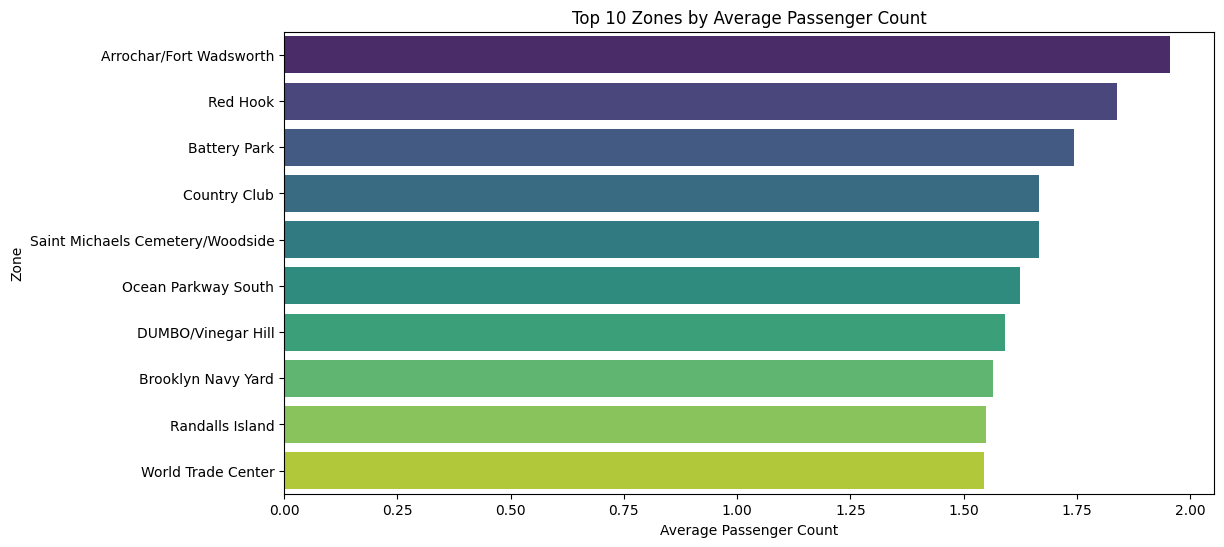

In [164]:
# How does passenger count vary across zones

# Group by pickup location ID and calculate average passenger count
zone_passenger_stats = trip_zones_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger_stats.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge to get zone names
zone_passenger_stats = zone_passenger_stats.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Sort by avg passenger count descending
zone_passenger_stats = zone_passenger_stats.sort_values('avg_passenger_count', ascending=False)

# Display top 10 zones with highest average passenger count
print(zone_passenger_stats[['zone', 'avg_passenger_count']].head(10))

# visualize top 10 zones
plt.figure(figsize=(12,6))
sns.barplot(data=zone_passenger_stats.head(10), y='zone', x='avg_passenger_count', palette='viridis')
plt.title('Top 10 Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.show()


In [166]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Step 1: Compute average passenger count per pickup location
avg_passenger_counts = trip_zones_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_counts.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Step 2: Merge with the zones GeoDataFrame
zones_with_passenger_info = zones.merge(
    avg_passenger_counts, 
    left_on='LocationID', 
    right_on='PULocationID', 
    how='left'
)

# Optional: Fill NaN with 0 for zones with no recorded trips
zones_with_passenger_info['avg_passenger_count'] = zones_with_passenger_info['avg_passenger_count'].fillna(0)

# Step 3: Display top 10 zones by average passenger count
print(zones_with_passenger_info[['LocationID', 'zone', 'borough', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10))


     LocationID                              zone        borough  \
5             6           Arrochar/Fort Wadsworth  Staten Island   
194         195                          Red Hook       Brooklyn   
11           12                      Battery Park      Manhattan   
57           58                      Country Club          Bronx   
206         207  Saint Michaels Cemetery/Woodside         Queens   
177         178               Ocean Parkway South       Brooklyn   
65           66                DUMBO/Vinegar Hill       Brooklyn   
33           34                Brooklyn Navy Yard       Brooklyn   
193         194                   Randalls Island      Manhattan   
260         261                World Trade Center      Manhattan   

     avg_passenger_count  
5               1.954545  
194             1.838710  
11              1.744157  
57              1.666667  
206             1.666667  
177             1.625000  
65              1.590498  
33              1.565217  
193     

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top Hours with Highest Average Extra Charges:
      congestion_surcharge   mta_tax  Airport_fee     extra
hour                                                       
17                2.344224  0.497294     0.137945  2.745229
18                2.357004  0.497637     0.124047  2.719797
16                2.320256  0.496217     0.159838  2.707080
19                2.344614  0.498107     0.142413  2.675486
5                 2.040360  0.482879     0.185656  1.847584
20                2.334385  0.498367     0.162058  1.821351
23                2.258612  0.498025     0.217368  1.807161
4                 2.238523  0.486899     0.059699  1.765821
21                2.337513  0.498549     0.158198  1.742921
22                2.320201  0.498511     0.168577  1.720163



Top Days with Highest Average Extra Charges:
           congestion_surcharge   mta_tax  Airport_fee     extra
day                                                             
Friday                 2.325308  0.496845     0.135788  1.847800
Thursday               2.339668  0.497094     0.131048  1.826489
Wednesday              2.336926  0.497373     0.130834  1.825207
Monday                 2.287755  0.496626     0.185286  1.823194
Tuesday                2.326405  0.497419     0.144455  1.810513
Sunday                 2.288003  0.495765     0.176696  1.232392
Saturday               2.347858  0.496976     0.107217  1.112780



Zones with Highest Average Congestion Surcharge:
                              zone  congestion_surcharge
58                    Crotona Park              2.500000
179                  Port Richmond              2.500000
1                      Jamaica Bay              2.500000
228          Upper East Side South              2.494854
220  Sutton Place/Turtle Bay North              2.494784
134                Lenox Hill West              2.493981
11                    Battery Park              2.493850
239                   West Village              2.493346
251                 Yorkville East              2.493081
107        Greenwich Village South              2.492179


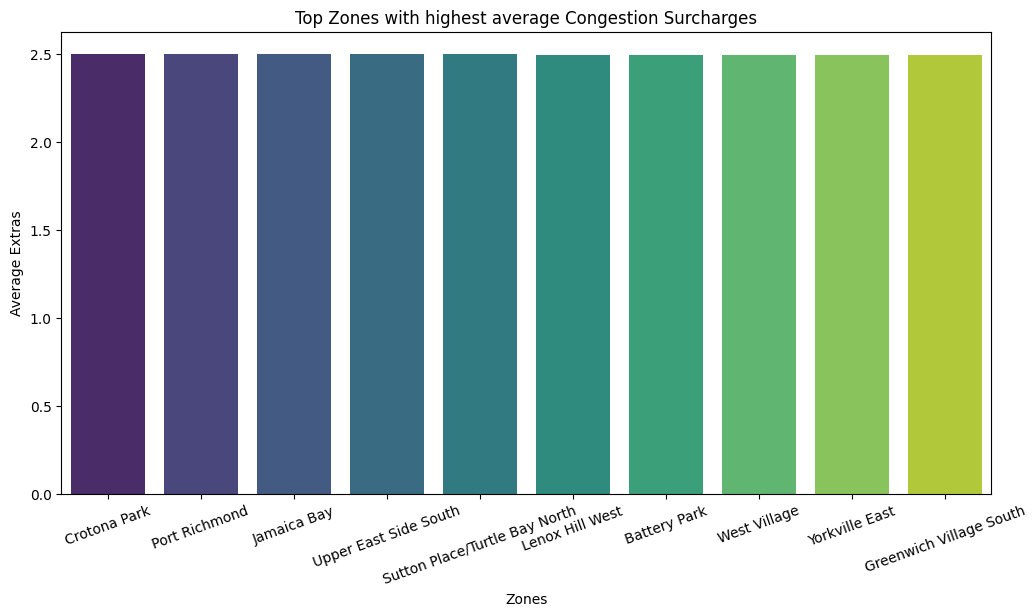

In [206]:
# How often is each surcharge applied?
# Focus on relevant columns
charges_df = trip_zones_df[['PULocationID', 'DOLocationID', 'hour', 'day',
                 'congestion_surcharge', 'mta_tax', 'Airport_fee', 'extra']]

# Compute average extra charges by pickup hour
hourly_avg = charges_df.groupby('hour')[['congestion_surcharge', 'mta_tax', 'Airport_fee', 'extra']].mean()

# Compute average extra charges by day of week
daily_avg = charges_df.groupby('day')[['congestion_surcharge', 'mta_tax', 'Airport_fee', 'extra']].mean()

# Compute average extra charges by pickup zone
zone_avg = trip_zones_df.groupby('PULocationID')[['congestion_surcharge', 'mta_tax', 'Airport_fee', 'extra']].mean().reset_index()
zone_avg = zone_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Sort zones with highest congestion surcharge
top_congestion_zones = zone_avg.sort_values(by='congestion_surcharge', ascending=False)[['zone', 'congestion_surcharge']].head(10)

# Show top results
print("Top Hours with Highest Average Extra Charges:")
print(hourly_avg.sort_values(by='extra', ascending=False).head(10))
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_avg.sort_values(by='extra', ascending=False).head(10), y='extra', x='hour', palette='viridis')
plt.title('Top 10 Hours with highest average extra charges')
plt.xlabel('Hours')
plt.ylabel('Average Extras')
plt.show()


print("\nTop Days with Highest Average Extra Charges:")
print(daily_avg.sort_values(by='extra', ascending=False))
plt.figure(figsize=(12,6))
sns.barplot(data=daily_avg.sort_values(by='extra', ascending=False).head(10), y='extra', x='day', palette='viridis')
plt.title('Top Days with highest average extra charges')
plt.xlabel('Days')
plt.ylabel('Average Extras')
plt.show()

print("\nZones with Highest Average Congestion Surcharge:")
print(top_congestion_zones)
plt.figure(figsize=(12,6))
sns.barplot(data=top_congestion_zones.head(10), y='congestion_surcharge', x='zone', palette='viridis')
plt.title('Top Zones with highest average Congestion Surcharges')
plt.xlabel('Zones')
plt.xticks(rotation=20)
plt.ylabel('Average Extras')
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [307]:
print('Cab placement should be increase towards high demand zones during peak hours to reduce wait time. Below are the details of High Demand zones with peak hours.\n')


# Count trips per pickup zone (PULocationID)
trip_counts = trip_zones_df.groupby(['PULocationID', 'hour']).size().reset_index(name='trip_count')

# Merge with zones
zones_with_counts = zones.merge(trip_counts, how='left', left_on='LocationID', right_on='PULocationID')
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)
zones_with_counts=zones_with_counts[['zone','LocationID', 'hour', 'trip_count']].sort_values(by='trip_count', ascending=False)

# Identify high-demand zones (potential bottlenecks)
high_demand_zones = zones_with_counts[zones_with_counts['trip_count'] > zones_with_counts['trip_count'].quantile(0.75)]
print("Top 10 High Demand Zones:\n")
print(high_demand_zones[['LocationID', 'zone', 'hour', 'trip_count']].head(10))

print('\nCab placement should be reduce from low demand zones during Off-peak hours to avoid vehicle sitting idle. Below are the details of Low Demand zones with Off-peak hours.\n')
# Identify zones with low trip counts (potential idle zones)
low_demand_zones = zones_with_counts[zones_with_counts['trip_count'] < zones_with_counts['trip_count'].quantile(0.25)]
print("\nLow Demand Zones:\n")
print(low_demand_zones[['LocationID', 'zone', 'hour', 'trip_count']].head(10))


Cab placement should be increase towards high demand zones during peak hours to reduce wait time. Below are the details of High Demand zones with peak hours.

Top 10 High Demand Zones:

      LocationID                   zone  hour  trip_count
2741         161         Midtown Center  18.0      7403.0
2740         161         Midtown Center  17.0      7137.0
2739         161         Midtown Center  16.0      6609.0
2167         132            JFK Airport  16.0      6604.0
2173         132            JFK Airport  22.0      6598.0
4060         237  Upper East Side South  14.0      6568.0
4063         237  Upper East Side South  17.0      6558.0
2166         132            JFK Airport  15.0      6557.0
4064         237  Upper East Side South  18.0      6543.0
4061         237  Upper East Side South  15.0      6529.0

Cab placement should be reduce from low demand zones during Off-peak hours to avoid vehicle sitting idle. Below are the details of Low Demand zones with Off-peak hours.


Low 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [311]:
print('\nBelow table shows number of trip made across host at different time, days and months\n. So, for example, cabs should be placed in Midtown Center at 18th hour on Thursday in month of March as during this time peroid more trip request was placed as per historic data.')
trip_zones_df.groupby(['zone', 'hour', 'day', 'month']).size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False).head(20)


Below table shows number of trip made across host at different time, days and months
. So, for example, cabs should be placed in Midtown Center at 18th hour on Thursday in month of March as during this time peroid more trip request was placed as per historic data.


zone  hour        day    month  trip_count
71283          Midtown Center    18   Thursday  2023-03         150
71393          Midtown Center    19  Wednesday  2023-05         147
26570            East Village     1     Sunday  2023-01         145
71297          Midtown Center    18    Tuesday  2023-05         143
26486            East Village     0     Sunday  2023-01         143
71314          Midtown Center    18  Wednesday  2023-10         142
26477            East Village     0   Saturday  2023-04         140
71307          Midtown Center    18  Wednesday  2023-03         139
48160             JFK Airport    22     Sunday  2023-10         139
48241             JFK Airport    23     Sunday  2023-07         137
47548             JFK Airport    15     Monday  2023-10         136
71302          Midtown Center    18    Tuesday  2023-10         136
71223          Midtown Center    17  Wednesday  2023-03         132
71213          Midtown Center    17    Tuesday  2023-05         132
71381          Midtown Center    19    Tuesday  2023-05         131
71391          Midtown Center    19  Wednesday  2023-03         130
106810  Upper East Side South    18  Wednesday  2023-05         130
71386          Midtown Center    19    Tuesday  2023-10         129
71141          Midtown Center    16  Wednesday  2023-05         129
71399          Midtown Center    19  Wednesday  2023-11         129

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [344]:
print('\nHigh Demand zones by different hours of the day:\n')

trip_zones_df.groupby(['zone','hour']).size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False).head(20)


High Demand zones by different hours of the day:



zone  hour  trip_count
2696         Midtown Center    18        7403
2695         Midtown Center    17        7137
2694         Midtown Center    16        6609
2057            JFK Airport    16        6604
2063            JFK Airport    22        6598
4029  Upper East Side South    14        6568
4032  Upper East Side South    17        6558
2056            JFK Airport    15        6557
4033  Upper East Side South    18        6543
4030  Upper East Side South    15        6529
4006  Upper East Side North    15        6470
2697         Midtown Center    19        6469
2062            JFK Airport    21        6299
4031  Upper East Side South    16        6272
2061            JFK Airport    20        6196
2058            JFK Airport    17        6177
2060            JFK Airport    19        6112
2693         Midtown Center    15        6100
2064            JFK Airport    23        6076
2692         Midtown Center    14        5935

    Action:
        Introduce surge pricing during peak demand periods and high-demand zones to maximize revenue.
        Adjust prices in near real-time based on live data (weather, events, time of day).
        Keep surge multipliers moderate to remain competitive with ride-hailing services